In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import sys
import sompy
from time import time
from sompy.visualization.bmuhits import BmuHitsView

np.set_printoptions(threshold=sys.maxsize) #see all elements, dont truncate

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
dFrame = pd.read_csv('somDatasetLLM.csv')
quakeLLMRecArr  = dFrame.to_records(index=False)
quakeLLM = np.array(quakeLLMRecArr.tolist())

In [3]:
mapsize = [17,17] #define map size
oneSevOneSevSom = sompy.SOMFactory.build(quakeLLM, 
                                       mapsize, 
                                       mask=None, 
                                       mapshape='planar', 
                                       lattice='rect', 
                                       normalization='var', 
                                       initialization='pca', 
                                       neighborhood='gaussian', 
                                       training='batch', 
                                       name='sompy') 

# this will use the default parameters, but I can change the initialization and neighborhood methods

oneSevOneSevSom.train(n_job=1, 
                      shared_memory = 'no', 
                      verbose='debug')  # verbose='debug' will print more,
                            # verbose=None wont print anything

 Training...
--------------------------------------------------------------
 details: 
      > data len is 3290 and data dimension is 3
      > map size is 17,17
      > array size in log10 scale is 6.455214995426185
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 pca_linear_initialization took: 0.005000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 3

 find_bmu took: 0.108000 seconds
 update_codebook_voronoi took: 0.000000 seconds
 epoch: 1 ---> elapsed time:  0.112000, quantization error: 0.760841

 find_bmu took: 0.109000 seconds
 update_codebook_voronoi took: 0.000000 seconds
 epoch: 2 ---> elapsed time:  0.109000, quantization error: 0.699585

 find_bmu took: 0.118000 seconds
 update_codebook_voronoi took: 0.000000 seconds
 epoch: 3 ---> elapsed time:  0.118000, quantization error: 0.535473

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 4

 find_bmu took:

In [7]:
v = sompy.mapview.View2DPacked(6, 6, 'Visualization',text_size=12) 
v

update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('C:\\Users\\afiqAUT\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.399999999999999 to DejaVu Sans ('C:\\Users\\afiqAUT\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\afiqAUT\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
upda

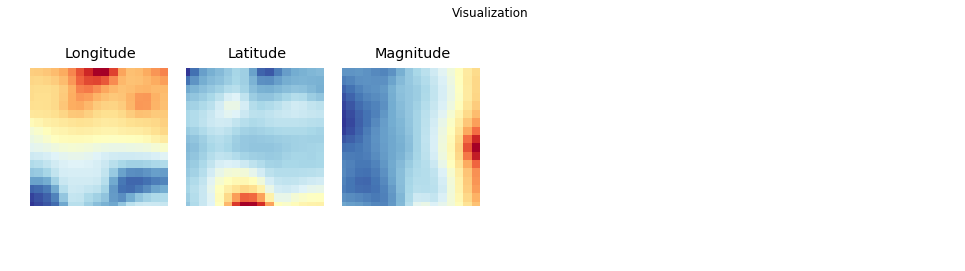

In [8]:
oneSevOneSevSom.component_names = ['Longitude','Latitude','Magnitude']
v.show(oneSevOneSevSom, what='codebook', which_dim='all', cmap=None, col_sz=6) #which_dim='all' default

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


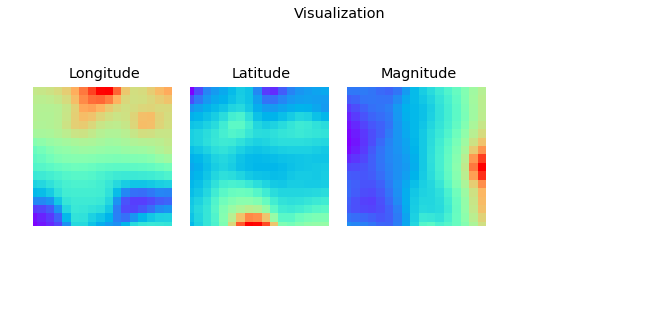

In [9]:
v.show(oneSevOneSevSom, what='codebook', which_dim='all', cmap='rainbow', col_sz=4) #which_dim='all' default

C:\Users\afiqAUT\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
update_title_pos
update_title_pos
update_title_pos
update_title_pos


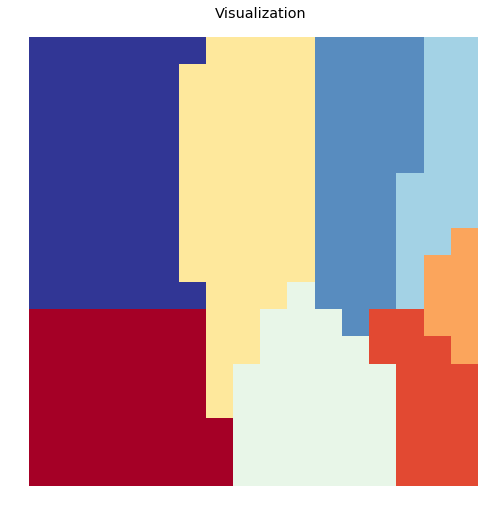

In [11]:
v.show(oneSevOneSevSom, what='cluster')

update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=7.0 to DejaVu Sans ('C:\\Users\\afiqAUT\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos


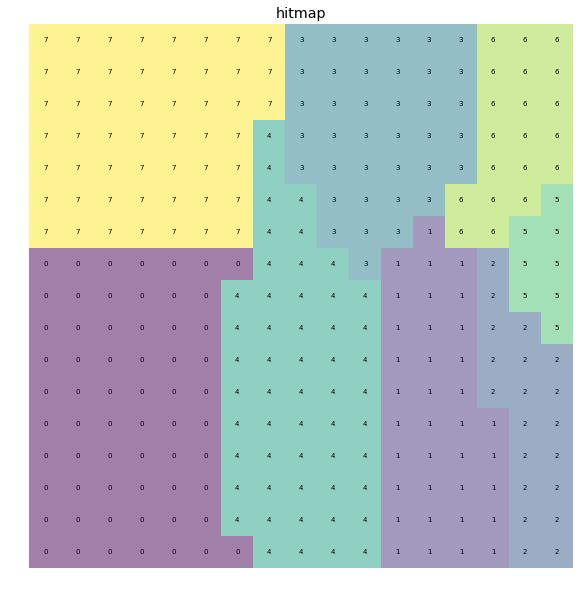

In [12]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=10, show_text=True)
h.show(oneSevOneSevSom)

In [13]:
oneSevOneSevSom.project_data(quakeLLM) # we can project each data point to a neuron

array([169, 169, 169, 169, 169, 169, 169, 169, 152, 152, 169, 152, 169,
       169, 169, 169, 152, 152, 169, 152, 186, 186, 220, 152, 168, 135,
       169, 101, 186, 135, 169, 169, 166, 186, 101, 186, 169, 152, 168,
       135,  16, 288, 169, 100, 167, 254, 135, 286, 135, 253,  14, 132,
        50,  33, 152, 186, 169, 237, 237, 202, 131, 237, 288, 151, 237,
        50,  31, 130, 186, 117, 220, 203, 253, 135, 254, 201, 133, 202,
       236, 150, 186, 254, 185, 116, 271, 135, 185, 167, 165, 271,  79,
       185, 237, 288, 287, 285, 151, 149,  16, 132, 101,  84, 182, 220,
       202, 270, 184, 182, 248, 265, 185, 271, 254,  50,  16,  50,  13,
       286, 195,  97, 181, 287, 237,  12, 234, 114, 130,  46, 267, 176,
       233, 146, 135, 216,  12, 129, 235, 287, 201, 159,  49, 185, 113,
       166,  30, 112, 187, 234, 218, 146, 198, 189, 177, 211, 130, 216,
       232,  62,  49,  29, 233,   9,  46, 284,  29, 230, 196,  49, 182,
       113, 183,  49, 234, 167, 186, 166, 252, 196, 135, 286, 25

In [14]:
oneSevOneSevSom.codebook.matrix

array([[ 7.234300e-01, -2.077503e+00, -5.828790e-01],
       [ 7.361800e-01, -1.476820e+00, -5.829240e-01],
       [ 7.888720e-01, -9.609690e-01, -5.683000e-01],
       [ 8.756530e-01, -7.618880e-01, -5.977290e-01],
       [ 1.013159e+00, -6.261230e-01, -6.777610e-01],
       [ 1.278033e+00, -4.294010e-01, -7.205180e-01],
       [ 1.641864e+00, -2.404690e-01, -6.027070e-01],
       [ 1.972231e+00, -3.247340e-01, -3.438930e-01],
       [ 2.324037e+00, -9.317770e-01, -7.232600e-02],
       [ 2.342529e+00, -1.602133e+00,  9.907800e-02],
       [ 1.767886e+00, -1.728276e+00,  2.341770e-01],
       [ 1.070697e+00, -1.341168e+00,  4.229050e-01],
       [ 8.512770e-01, -9.884120e-01,  6.052040e-01],
       [ 8.844050e-01, -8.200840e-01,  8.162800e-01],
       [ 1.010783e+00, -7.366740e-01,  1.079638e+00],
       [ 1.173306e+00, -6.761570e-01,  1.362007e+00],
       [ 1.303295e+00, -6.292130e-01,  1.560478e+00],
       [ 6.496790e-01, -1.452782e+00, -7.679260e-01],
       [ 6.451280e-01, -1.07

In [15]:
len(oneSevOneSevSom.codebook.matrix) #this is the map itself

289

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


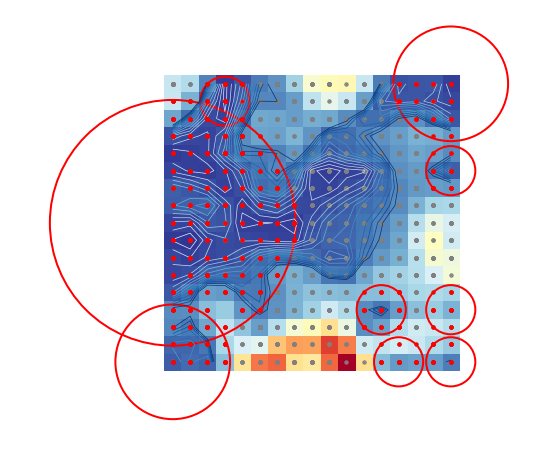

In [16]:
u = sompy.umatrix.UMatrixView(12, 
                              12, 
                              'umatrix', 
                              show_axis=True, 
                              text_size=8, 
                              show_text=True) #prep the plot

#This is the Umat value
UMAT  = u.build_u_matrix(oneSevOneSevSom, 
                         distance=1,  
                         row_normalized=False) #build the plot

#Here you have Umatrix plus its render
UMAT = u.show(oneSevOneSevSom, 
              distance2=1, 
              row_normalized=False,
              show_data=True, 
              contooor=True, 
              blob=True)

update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=24.0 to DejaVu Sans ('C:\\Users\\afiqAUT\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos


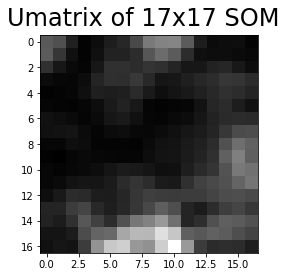

In [17]:
greyMat = UMAT[1]
plt.imshow(greyMat, cmap="gray")
plt.suptitle('Umatrix of 17x17 SOM', fontsize=24)
plt.show()

In [18]:
#do this towards the end. See the map first then assign cluster Labels
vis2 = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = oneSevOneSevSom.cluster(n_clusters=4) #this is cluster labels
# print cl
getattr(oneSevOneSevSom, 'cluster_labels')

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 1,
       1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 2])

In [19]:
#we have agreed that this looks like 4 lcusters. So trace the 
map_labels = oneSevOneSevSom.cluster(n_clusters=4)
data_labels = np.array([map_labels[int(k)] for k in oneSevOneSevSom._bmu[0]]) # mapping labels from grid to original data


In [20]:
map_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 0,
       0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 2])

In [25]:
data_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 3, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 3, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 3, 1,
       0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 3, 3, 3, 3, 2, 2, 0, 0, 0, 1, 3, 0, 0,
       3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 1, 0, 3, 3,
       3, 3, 0, 2, 1, 1, 1, 0, 3, 2, 2, 2, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3,
       1, 0, 3, 0, 3, 0, 2, 2, 1, 1, 1, 3, 0, 2, 2, 3, 0, 2, 0, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 1, 3, 3, 1, 1, 3, 2, 0, 0, 3,
       0, 0, 0, 3, 0, 1, 1, 0, 1, 3, 3, 0, 3, 3, 0,

In [35]:
countClust0= 0
countClust1= 0
countClust2= 0
countClust3= 0

for t in range(0, len(data_labels)):
    if (data_labels[t] == 0):
        countClust0 += 1
    elif (data_labels[t] == 1):
        countClust1 += 1
    elif (data_labels[t] == 2):
        countClust2 += 1
    elif (data_labels[t] == 3):
        countClust3 += 1
        
clustCount = np.array([countClust0, countClust1, countClust2, countClust3]) #sizes

In [43]:
print("cluster 0 has : " + str(countClust0))
print("cluster 1 has : " + str(countClust1))
print("cluster 2 has : " + str(countClust2))
print("cluster 3 has : " + str(countClust3))

print("Total instances from sum of cluster entities: " + str(countClust0 + countClust1 + countClust2 + countClust3))

cluster 0 has : 871
cluster 1 has : 1163
cluster 2 has : 346
cluster 3 has : 910
Total instances from sum of cluster entities: 3290


0.10516717325227963

update_title_pos
update_title_pos
update_title_pos
update_title_pos


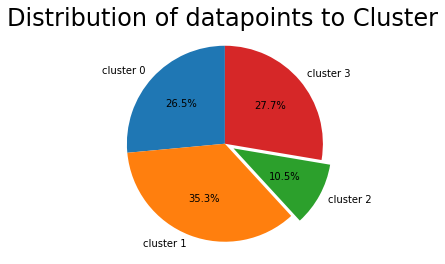

In [37]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'cluster 0', 'cluster 1', 'cluster 2', 'cluster 3'
#sizes = [15, 30, 45, 10]
explode = (0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(clustCount , explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.suptitle('Distribution of datapoints to Cluster', fontsize=24)

plt.show()

In [34]:
countClust0 + countClust1 + countClust2  + countClust3 

3290

In [22]:
len(data_labels) #brother, do me a favour and count the data points that belong to each cluster

3290

In [61]:
#we can append the data cluster labels into array

clusteredOneSevOneSevLLM = np.column_stack((quakeLLM, data_labels))

In [62]:
clusteredOneSevOneSevLLM 

array([[172.16794, -43.52731,   7.2    ,   2.     ],
       [172.32367, -43.55426,   5.815  ,   2.     ],
       [172.38512, -43.6585 ,   5.114  ,   2.     ],
       [172.29477, -43.5661 ,   5.532  ,   2.     ],
       [172.18575, -43.4711 ,   5.434  ,   2.     ],
       [172.11847, -43.49201,   5.162  ,   2.     ],
       [172.11028, -43.62283,   5.335  ,   2.     ],
       [172.21217, -43.59541,   4.921  ,   2.     ],
       [172.4296 , -43.68362,   4.565  ,   2.     ],
       [172.54439, -43.58787,   4.75   ,   2.     ],
       [172.30362, -43.58586,   4.971  ,   2.     ],
       [172.37521, -43.66354,   4.822  ,   2.     ],
       [172.23647, -43.64153,   4.945  ,   2.     ],
       [172.27835, -43.63268,   4.912  ,   2.     ],
       [172.41315, -43.60732,   4.979  ,   2.     ],
       [172.16673, -43.60926,   5.144  ,   2.     ],
       [172.27443, -43.61766,   4.569  ,   2.     ],
       [172.40707, -43.64999,   4.491  ,   2.     ],
       [172.16286, -43.46124,   5.359  ,   2. 

In [64]:
#export ND array to csv

np.savetxt("clusteredx17LLM.csv", clusteredOneSevOneSevLLM , fmt='%.20f' , delimiter=",")

In [7]:
dFrame = pd.read_csv('somDatasetLLD.csv')
quakeLLMRecArr  = dFrame.to_records(index=False)
quakeLLD = np.array(quakeLLMRecArr.tolist())

In [8]:
mapsize = [17,17] #define map size
oneSevOneSevDSom = sompy.SOMFactory.build(quakeLLD, 
                                 mapsize, 
                                 mask=None, 
                                 mapshape='planar', 
                                 lattice='rect', 
                                 normalization='var', 
                                 initialization='pca', 
                                 neighborhood='gaussian', 
                                 training='batch', 
                                 name='sompy') 

# this will use the default parameters, but I can change the initialization and neighborhood methods

oneSevOneSevDSom .train(n_job=1, 
                shared_memory = 'no', 
                verbose='debug')  # verbose='debug' will print more,
                            # verbose=None wont print anything

 Training...
--------------------------------------------------------------
 details: 
      > data len is 3290 and data dimension is 3
      > map size is 17,17
      > array size in log10 scale is 6.455214995426185
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 pca_linear_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 3

 find_bmu took: 0.106000 seconds
 update_codebook_voronoi took: 0.000000 seconds
 epoch: 1 ---> elapsed time:  0.106000, quantization error: 0.760555

 find_bmu took: 0.111000 seconds
 update_codebook_voronoi took: 0.000000 seconds
 epoch: 2 ---> elapsed time:  0.111000, quantization error: 0.484942

 find_bmu took: 0.125000 seconds
 update_codebook_voronoi took: 0.000000 seconds
 epoch: 3 ---> elapsed time:  0.125000, quantization error: 0.337033

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 4

 find_bmu took:

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\afiqAUT\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


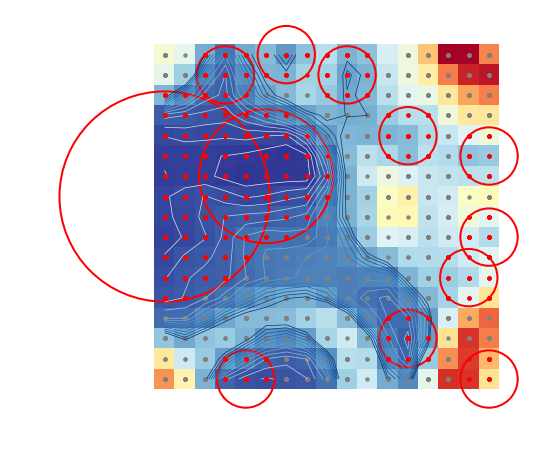

In [9]:
u = sompy.umatrix.UMatrixView(12, 
                              12, 
                              'umatrix', 
                              show_axis=True, 
                              text_size=8, 
                              show_text=True) #prep the plot

#This is the Umat value
UMAT  = u.build_u_matrix(oneSevOneSevDSom, 
                         distance=1,  
                         row_normalized=False) #build the plot

#Here you have Umatrix plus its render
UMAT = u.show(oneSevOneSevDSom, 
              distance2=1, 
              row_normalized=False,
              show_data=True, 
              contooor=True, 
              blob=True)

update_title_pos
update_title_pos
update_title_pos
update_title_pos


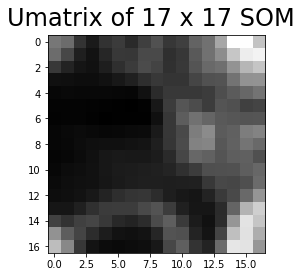

In [11]:
greyMat = UMAT[1]
plt.imshow(greyMat, cmap="gray")
plt.suptitle('Umatrix of 17 x 17 SOM', fontsize=24)
plt.show()